In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
# Make sure to update the file path to your actual dataset location
df = pd.read_csv('/content/Netflix Dataset.csv')  # Update with your file path

# Display basic dataset information
print("="*50)
print("📊 DATASET OVERVIEW")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())

# Display first few records
print("\n" + "="*50)
print("FIRST 5 RECORDS")
print("="*50)
print(df.head())

# Display dataset information
print("\n" + "="*50)
print("DATASET INFO")
print("="*50)
print(df.info())

# Display basic statistics
print("\n" + "="*50)
print("BASIC STATISTICS")
print("="*50)
print(df.describe(include='all'))

📊 DATASET OVERVIEW
Dataset Shape: (7789, 11)
Number of Records: 7789
Number of Columns: 11

Column Names:
['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

FIRST 5 RECORDS
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Durati

In [4]:
# Data Cleaning and Preprocessing
print("="*50)
print("🧹 DATA CLEANING AND PREPROCESSING")
print("="*50)

# Check for missing values
print("MISSING VALUES ANALYSIS:")
print("="*30)
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_info)

# Handle missing values
# Fill missing categorical values with 'Unknown'
categorical_columns = ['Director', 'Cast', 'Country']
for col in categorical_columns:
    df[col].fillna('Unknown', inplace=True)

# Convert Release_Date to datetime and extract features
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['year_added'] = df['Release_Date'].dt.year
df['month_added'] = df['Release_Date'].dt.month

# Extract duration numerical values and unit
df['duration_num'] = df['Duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['Duration'].str.extract('([a-zA-Z]+)')

print("\nDATA TYPES AFTER CLEANING:")
print("="*30)
print(df.dtypes)

print(f"\nCleaning completed! Missing values handled and new features created.")

🧹 DATA CLEANING AND PREPROCESSING
MISSING VALUES ANALYSIS:
              Missing Count  Missing Percentage
Show_Id                   0            0.000000
Category                  0            0.000000
Title                     0            0.000000
Director               2388           30.658621
Cast                    718            9.218128
Country                 507            6.509180
Release_Date             10            0.128386
Rating                    7            0.089870
Duration                  0            0.000000
Type                      0            0.000000
Description               0            0.000000

DATA TYPES AFTER CLEANING:
Show_Id                  object
Category                 object
Title                    object
Director                 object
Cast                     object
Country                  object
Release_Date     datetime64[ns]
Rating                   object
Duration                 object
Type                     object
Description      

🎬 CONTENT TYPE ANALYSIS
CONTENT TYPE DISTRIBUTION:
Movie: 5379 (69.1%)
TV Show: 2410 (30.9%)


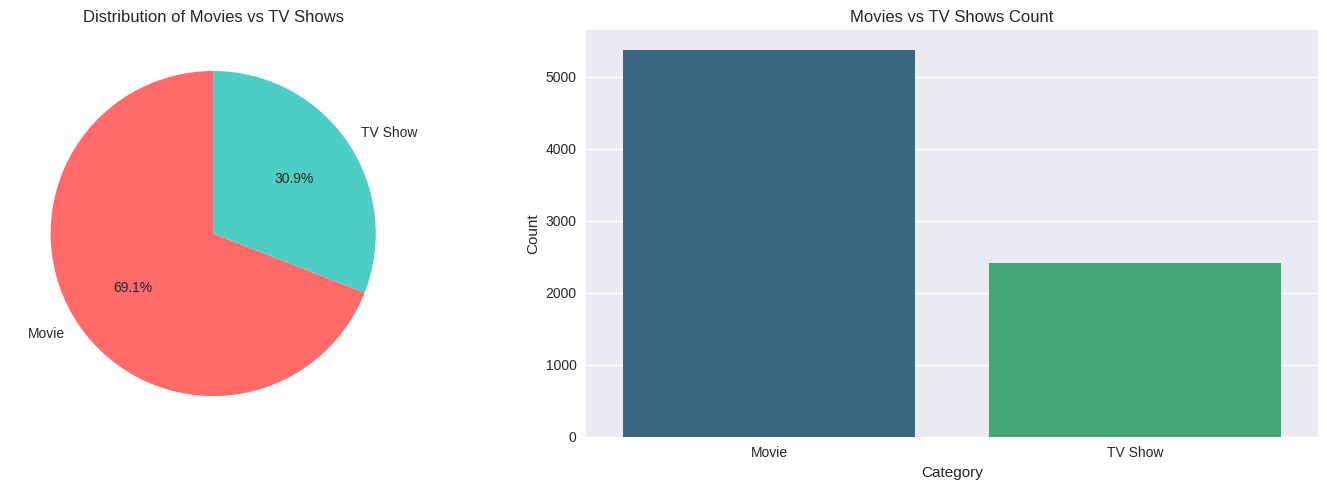


YEARLY CONTENT ADDITION TREND:
Category    Movie  TV Show
year_added                
2008.0          1        1
2009.0          2        0
2010.0          1        0
2011.0         13        0
2012.0          3        0
2013.0          6        4
2014.0         19        5
2015.0         58       21
2016.0        258      174
2017.0        864      337
2018.0       1255      406
2019.0       1498      639
2020.0       1313      696
2021.0         88       29


<Figure size 1200x600 with 0 Axes>

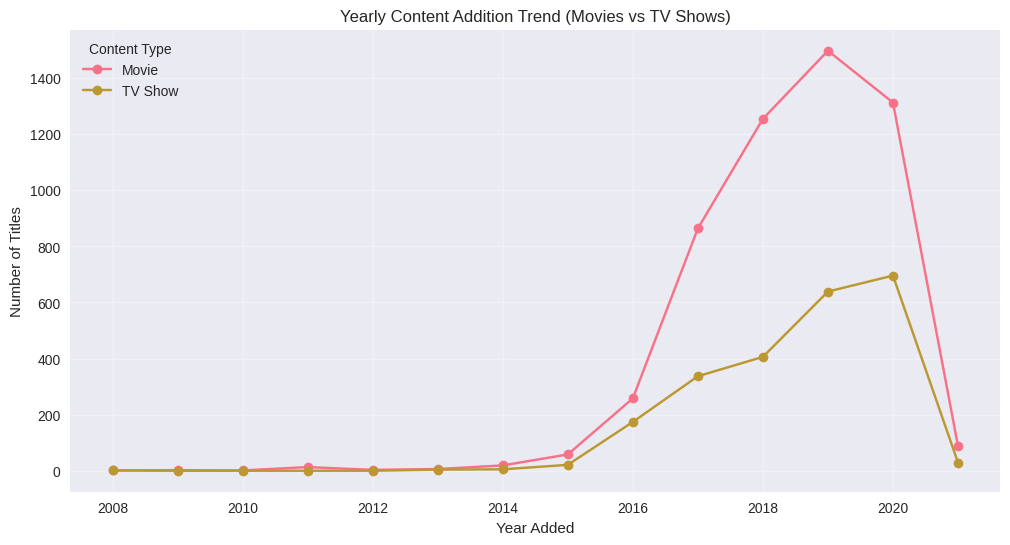

In [5]:
# Content Type Analysis
print("="*50)
print("🎬 CONTENT TYPE ANALYSIS")
print("="*50)

# Count of Movies vs TV Shows
content_type_counts = df['Category'].value_counts()
content_type_percentage = df['Category'].value_counts(normalize=True) * 100

print("CONTENT TYPE DISTRIBUTION:")
print("="*30)
for i, (content_type, count) in enumerate(content_type_counts.items()):
    print(f"{content_type}: {count} ({content_type_percentage[i]:.1f}%)")

# Visualization
plt.figure(figsize=(15, 5))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(content_type_counts.values, labels=content_type_counts.index,
        autopct='%1.1f%%', startangle=90, colors=['#ff6b6b', '#4ecdc4'])
plt.title('Distribution of Movies vs TV Shows')

# Bar chart
plt.subplot(1, 2, 2)
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')
plt.title('Movies vs TV Shows Count')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Yearly trend of content addition
print("\nYEARLY CONTENT ADDITION TREND:")
print("="*30)
yearly_content = df.groupby(['year_added', 'Category']).size().unstack(fill_value=0)
print(yearly_content)

# Plot yearly trend
plt.figure(figsize=(12, 6))
yearly_content.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Yearly Content Addition Trend (Movies vs TV Shows)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True, alpha=0.3)
plt.legend(title='Content Type')
plt.show()

🎭 GENRE ANALYSIS
TOP 15 GENRES:
1. International Movies: 2437
2. Dramas: 2108
3. Comedies: 1472
4. International TV Shows: 1199
5. Documentaries: 786
6. Action & Adventure: 721
7. TV Dramas: 704
8. Independent Movies: 675
9. Children & Family Movies: 532
10. Romantic Movies: 531
11. TV Comedies: 525
12. Thrillers: 492
13. Crime TV Shows: 427
14. Kids' TV: 414
15. Docuseries: 353


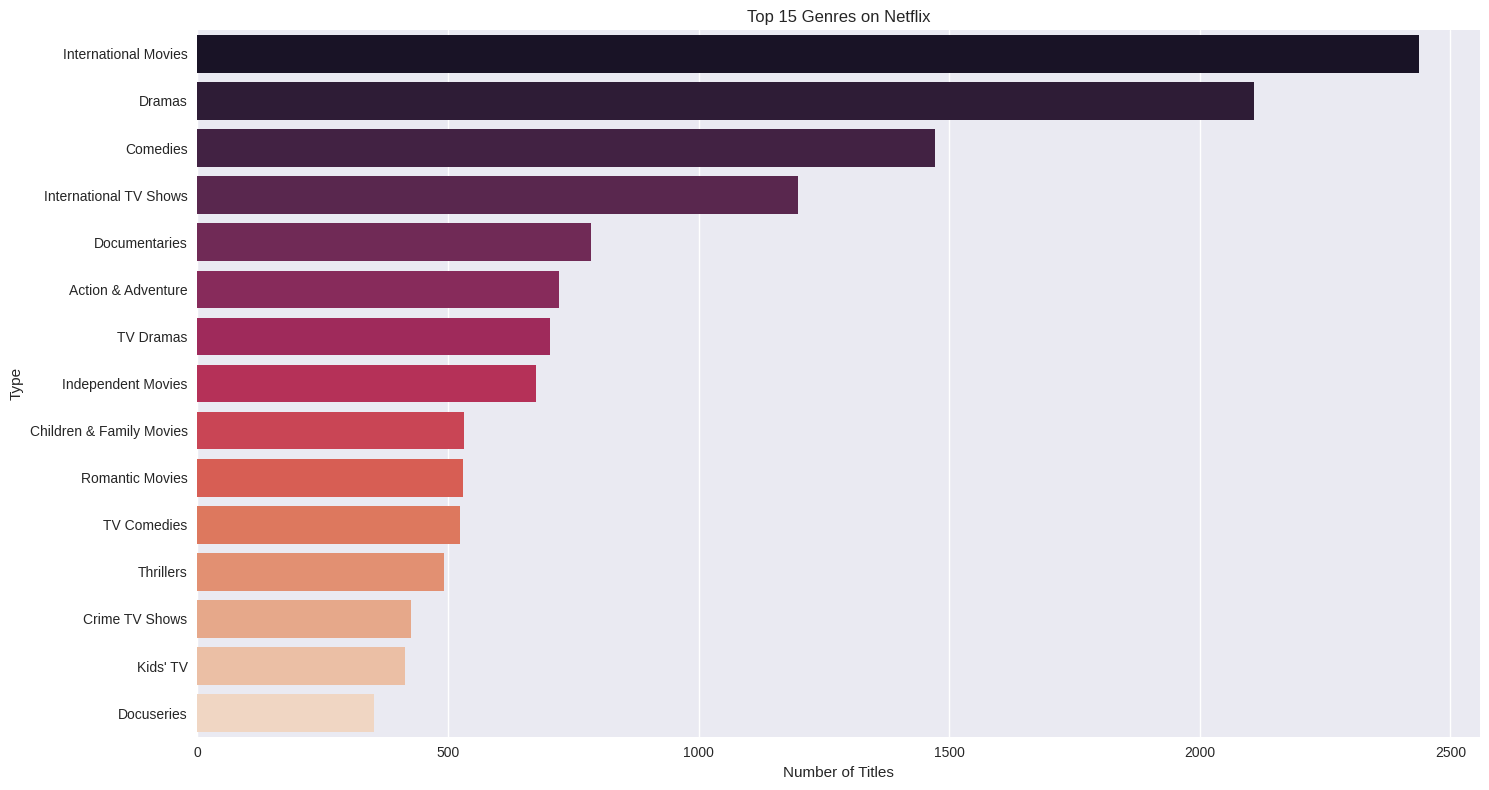


GENRE DISTRIBUTION BY CONTENT TYPE:
Top 10 Movie Genres:
Type
International Movies        2437
Dramas                      2108
Comedies                    1472
Documentaries                786
Action & Adventure           721
Independent Movies           675
Children & Family Movies     532
Romantic Movies              531
Thrillers                    492
Stand-Up Comedy              329
Name: count, dtype: int64

Top 10 TV Show Genres:
Type
International TV Shows    1199
TV Dramas                  704
TV Comedies                525
Crime TV Shows             427
Kids' TV                   414
Docuseries                 353
Romantic TV Shows          333
British TV Shows           232
Reality TV                 222
Korean TV Shows            150
Name: count, dtype: int64


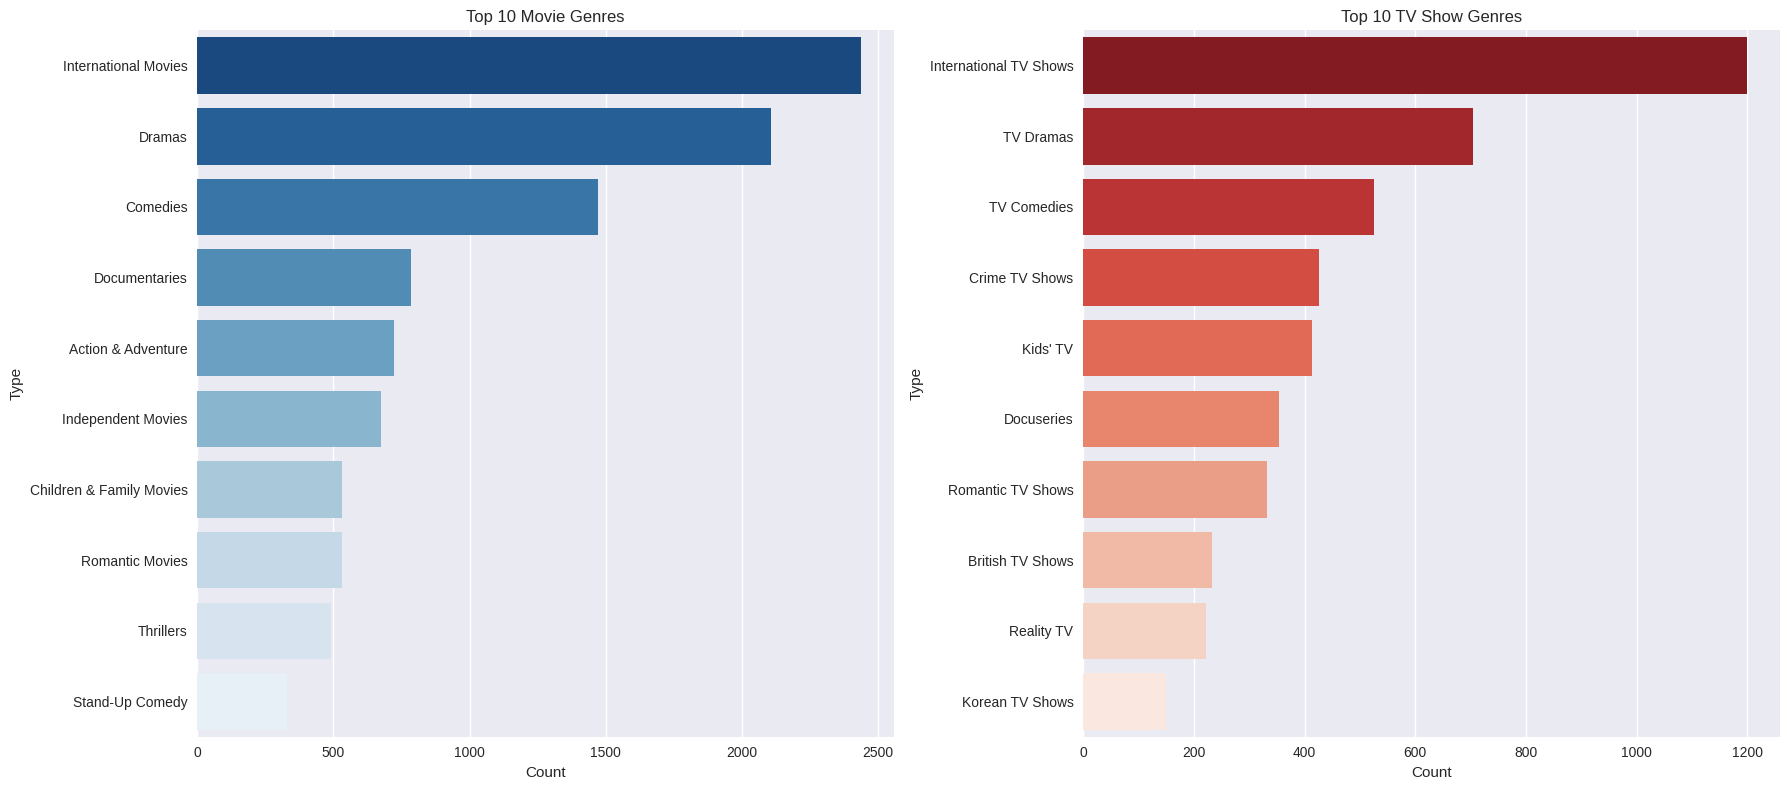

In [7]:
# Genre Analysis
print("="*50)
print("🎭 GENRE ANALYSIS")
print("="*50)

# Extract and analyze genres
df['Type'] = df['Type'].astype(str)
all_genres = df['Type'].str.split(', ').explode()

# Top genres
top_genres = all_genres.value_counts().head(15)

print("TOP 15 GENRES:")
print("="*30)
for i, (genre, count) in enumerate(top_genres.items()):
    print(f"{i+1}. {genre}: {count}")

# Visualization
plt.figure(figsize=(15, 8))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='rocket')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()

# Genre distribution by content type
print("\nGENRE DISTRIBUTION BY CONTENT TYPE:")
print("="*30)
movies_genres = df[df['Category'] == 'Movie']['Type'].str.split(', ').explode().value_counts().head(10)
tv_shows_genres = df[df['Category'] == 'TV Show']['Type'].str.split(', ').explode().value_counts().head(10)

print("Top 10 Movie Genres:")
print(movies_genres)
print("\nTop 10 TV Show Genres:")
print(tv_shows_genres)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(y=movies_genres.index, x=movies_genres.values, ax=ax1, palette='Blues_r')
ax1.set_title('Top 10 Movie Genres')
ax1.set_xlabel('Count')

sns.barplot(y=tv_shows_genres.index, x=tv_shows_genres.values, ax=ax2, palette='Reds_r')
ax2.set_title('Top 10 TV Show Genres')
ax2.set_xlabel('Count')

plt.tight_layout()
plt.show()

🌍 COUNTRY-WISE ANALYSIS
TOP 15 CONTRIBUTING COUNTRIES:
1. United States: 3297
2. India: 990
3. United Kingdom: 722
4. Canada: 412
5. France: 349
6. Japan: 287
7. Spain: 215
8. South Korea: 212
9. Germany: 199
10. Mexico: 154
11. China: 147
12. Australia: 144
13. Egypt: 110
14. Turkey: 108
15. Hong Kong: 102


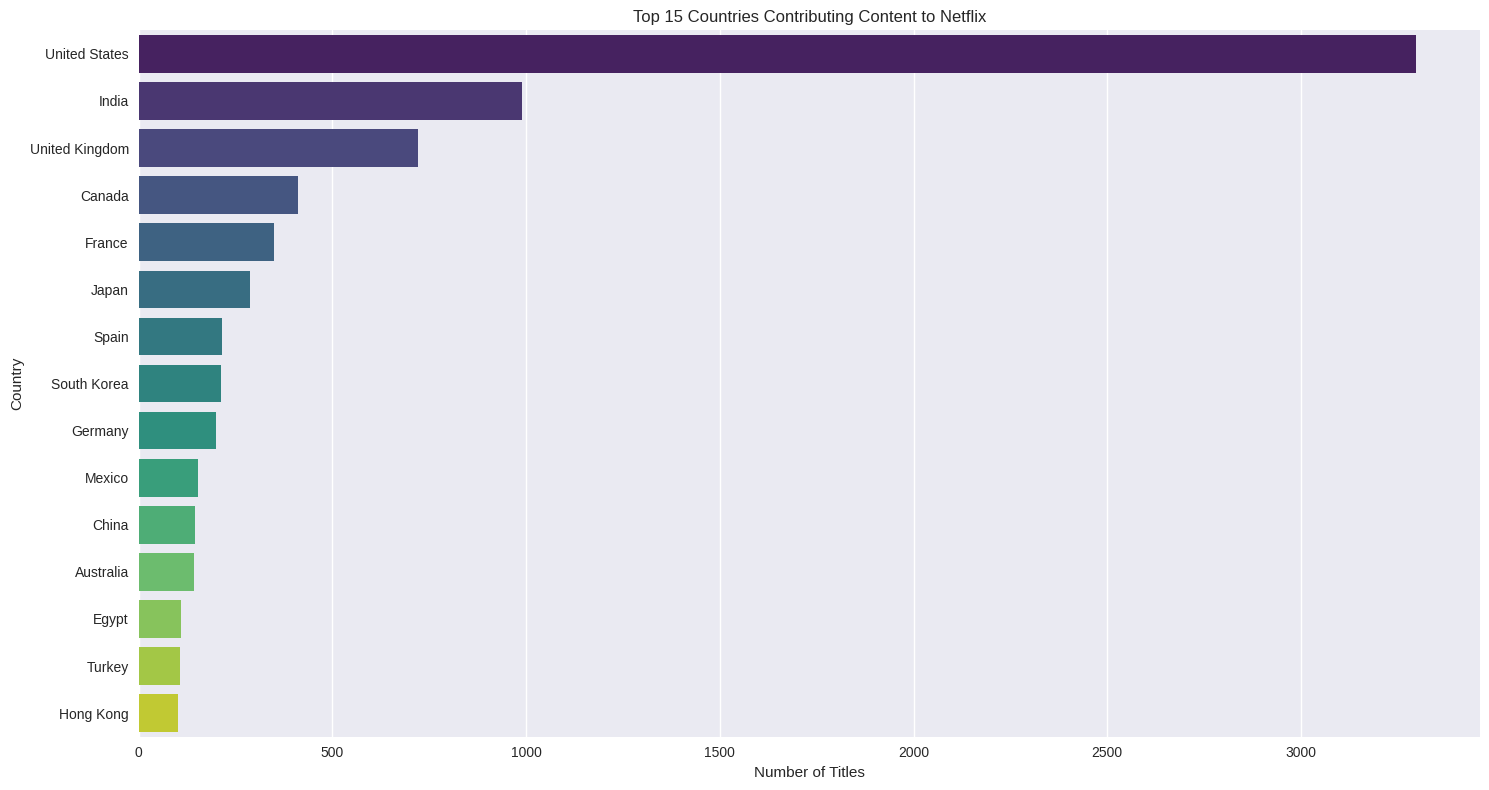


COUNTRY ANALYSIS BY CONTENT TYPE:
Top 10 Movie Producing Countries:
Country
United States     2431
India              915
United Kingdom     466
Canada             286
France             265
Spain              158
Germany            157
Japan              103
China              102
Mexico             101
Name: count, dtype: int64

Top 10 TV Show Producing Countries:
Country
United States     866
United Kingdom    256
Japan             184
South Korea       157
Canada            126
France             84
India              75
Taiwan             70
Australia          60
Spain              57
Name: count, dtype: int64


In [9]:
# Country-wise Analysis
print("="*50)
print("🌍 COUNTRY-WISE ANALYSIS")
print("="*50)

# Extract countries (handling multiple countries per title)
df['Country'] = df['Country'].astype(str)
all_countries = df['Country'].str.split(', ').explode()

# Clean country data
all_countries = all_countries[all_countries != 'Unknown']

# Top countries
top_countries = all_countries.value_counts().head(15)

print("TOP 15 CONTRIBUTING COUNTRIES:")
print("="*30)
for i, (country, count) in enumerate(top_countries.items()):
    print(f"{i+1}. {country}: {count}")

# Visualization
plt.figure(figsize=(15, 8))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title('Top 15 Countries Contributing Content to Netflix')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()

# Country analysis by content type
print("\nCOUNTRY ANALYSIS BY CONTENT TYPE:")
print("="*30)
movies_countries = df[df['Category'] == 'Movie']['Country'].str.split(', ').explode()
movies_countries = movies_countries[movies_countries != 'Unknown'].value_counts().head(10)

tv_shows_countries = df[df['Category'] == 'TV Show']['Country'].str.split(', ').explode()
tv_shows_countries = tv_shows_countries[tv_shows_countries != 'Unknown'].value_counts().head(10)

print("Top 10 Movie Producing Countries:")
print(movies_countries)
print("\nTop 10 TV Show Producing Countries:")
print(tv_shows_countries)

⭐ RATINGS AND DURATION ANALYSIS
CONTENT RATINGS DISTRIBUTION:
TV-MA: 2865 (36.8%)
TV-14: 1931 (24.8%)
TV-PG: 806 (10.3%)
R: 665 (8.5%)
PG-13: 386 (5.0%)
TV-Y: 280 (3.6%)
TV-Y7: 271 (3.5%)
PG: 247 (3.2%)
TV-G: 194 (2.5%)
NR: 84 (1.1%)
G: 39 (0.5%)
TV-Y7-FV: 6 (0.1%)
UR: 5 (0.1%)
NC-17: 3 (0.0%)


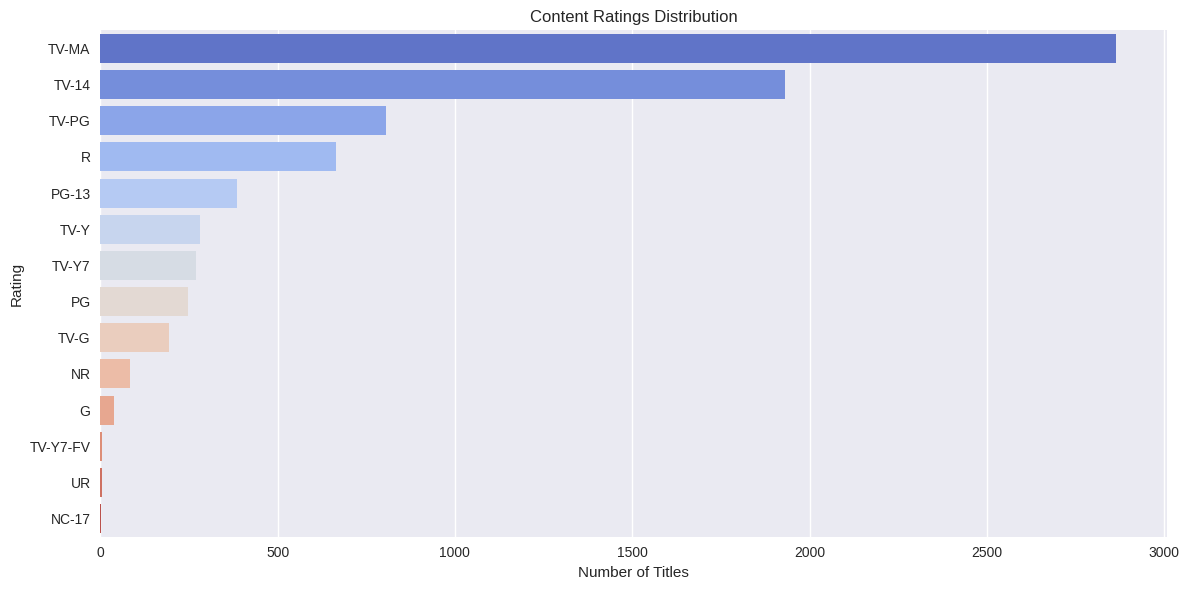


MOVIE DURATION ANALYSIS:
Average Movie Duration: 99.3 minutes
Longest Movie: 312.0 minutes
Shortest Movie: 3.0 minutes

TV SHOW SEASONS ANALYSIS:
Average Number of Seasons: 1.8
Most Seasons: 16.0
Single Season Shows: 1608


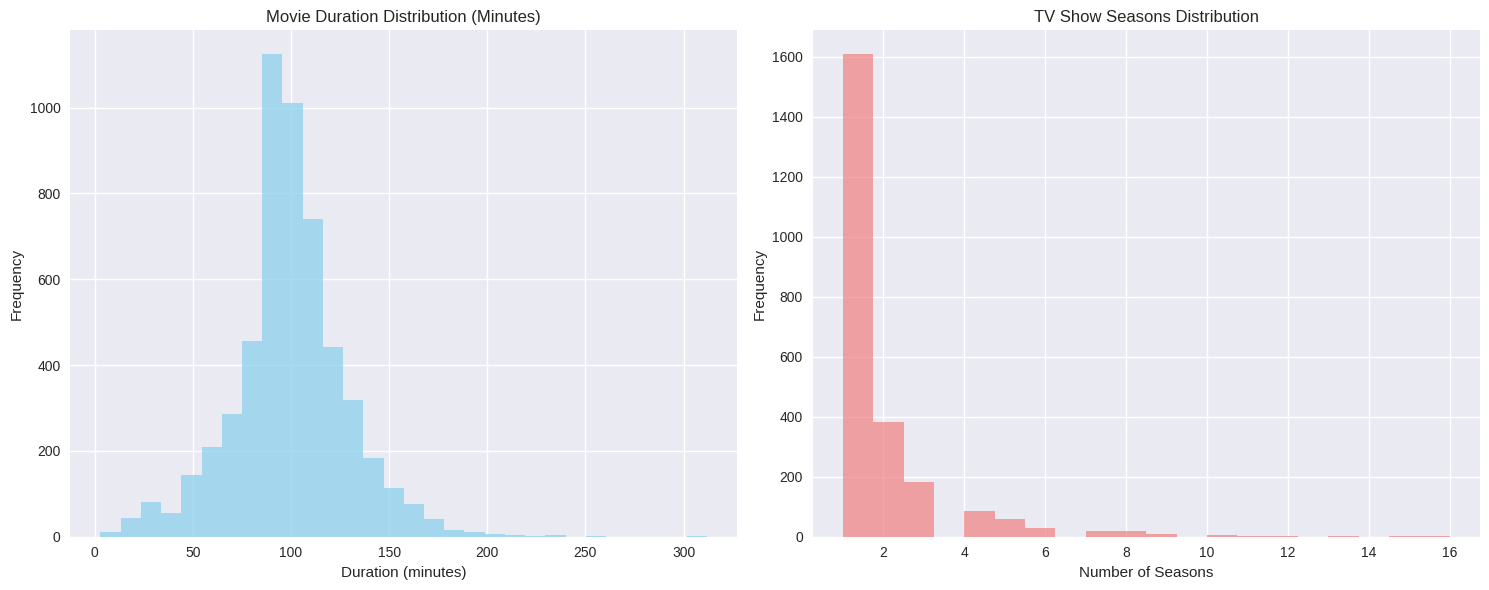

In [11]:
# Ratings and Duration Analysis
print("="*50)
print("⭐ RATINGS AND DURATION ANALYSIS")
print("="*50)

# Ratings distribution
ratings_dist = df['Rating'].value_counts()

print("CONTENT RATINGS DISTRIBUTION:")
print("="*30)
for rating, count in ratings_dist.items():
    percentage = (count / len(df)) * 100
    print(f"{rating}: {count} ({percentage:.1f}%)")

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=ratings_dist.values, y=ratings_dist.index, palette='coolwarm')
plt.title('Content Ratings Distribution')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()

# Duration analysis for movies
print("\nMOVIE DURATION ANALYSIS:")
print("="*30)
movies_duration = df[(df['Category'] == 'Movie') & (df['duration_num'].notnull())]
print(f"Average Movie Duration: {movies_duration['duration_num'].mean():.1f} minutes")
print(f"Longest Movie: {movies_duration['duration_num'].max()} minutes")
print(f"Shortest Movie: {movies_duration['duration_num'].min()} minutes")

# TV Shows seasons analysis
print("\nTV SHOW SEASONS ANALYSIS:")
print("="*30)
tv_shows_seasons = df[(df['Category'] == 'TV Show') & (df['duration_num'].notnull())]
print(f"Average Number of Seasons: {tv_shows_seasons['duration_num'].mean():.1f}")
print(f"Most Seasons: {tv_shows_seasons['duration_num'].max()}")
print(f"Single Season Shows: {len(tv_shows_seasons[tv_shows_seasons['duration_num'] == 1])}")

# Duration distribution visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Movies duration distribution
movies_duration['duration_num'].hist(bins=30, ax=ax1, color='skyblue', alpha=0.7)
ax1.set_title('Movie Duration Distribution (Minutes)')
ax1.set_xlabel('Duration (minutes)')
ax1.set_ylabel('Frequency')

# TV Shows seasons distribution
tv_shows_seasons['duration_num'].hist(bins=20, ax=ax2, color='lightcoral', alpha=0.7)
ax2.set_title('TV Show Seasons Distribution')
ax2.set_xlabel('Number of Seasons')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

📈 TEMPORAL TRENDS ANALYSIS
CONTENT RELEASE TREND OVER YEARS:
Earliest Release Year: 2008.0
Latest Release Year: 2021.0


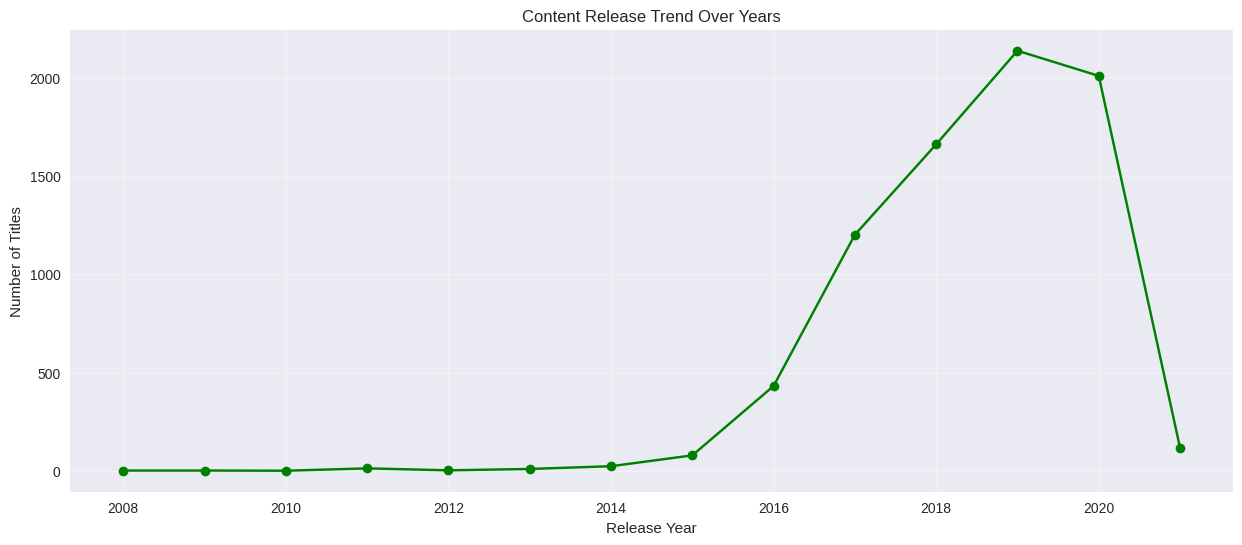


MONTHLY CONTENT ADDITION PATTERN:


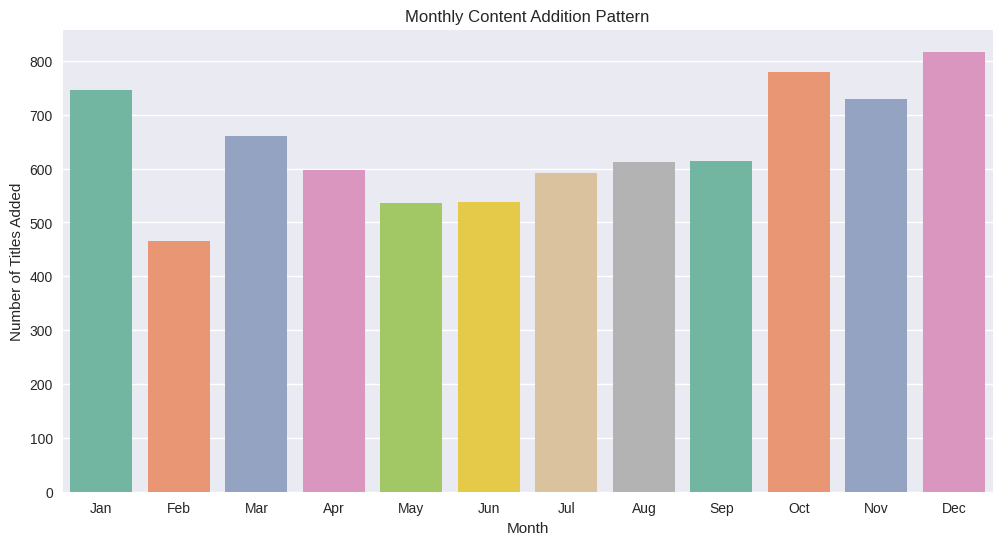


TOP GENRES IN RECENT YEARS (2016-2021):
1. International Movies: 2423
2. Dramas: 2081
3. Comedies: 1455
4. International TV Shows: 1172
5. Documentaries: 763
6. Action & Adventure: 718
7. TV Dramas: 670
8. Independent Movies: 667
9. Romantic Movies: 530
10. Children & Family Movies: 513


In [13]:
# Temporal Trends Analysis
print("="*50)
print("📈 TEMPORAL TRENDS ANALYSIS")
print("="*50)

# Extract release year
df['release_year'] = df['Release_Date'].dt.year

# Release year trends
release_year_trend = df['release_year'].value_counts().sort_index()

print("CONTENT RELEASE TREND OVER YEARS:")
print("="*30)
print(f"Earliest Release Year: {df['release_year'].min()}")
print(f"Latest Release Year: {df['release_year'].max()}")

# Visualization
plt.figure(figsize=(15, 6))
release_year_trend.plot(kind='line', color='green', marker='o')
plt.title('Content Release Trend Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True, alpha=0.3)
plt.show()

# Monthly addition pattern
print("\nMONTHLY CONTENT ADDITION PATTERN:")
print("="*30)
monthly_additions = df['month_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values, palette='Set2')
plt.title('Monthly Content Addition Pattern')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Recent trends (last 5 years)
recent_trends = df[df['release_year'] >= 2016]
recent_genres = recent_trends['Type'].str.split(', ').explode().value_counts().head(10)

print("\nTOP GENRES IN RECENT YEARS (2016-2021):")
print("="*30)
for i, (genre, count) in enumerate(recent_genres.items()):
    print(f"{i+1}. {genre}: {count}")

In [15]:
# Strategic Insights and Summary
print("="*50)
print("💡 STRATEGIC INSIGHTS AND RECOMMENDATIONS")
print("="*50)

# Key metrics calculation
total_content = len(df)
movies_count = len(df[df['Category'] == 'Movie'])
tv_shows_count = len(df[df['Category'] == 'TV Show'])
movies_percentage = (movies_count / total_content) * 100
tv_shows_percentage = (tv_shows_count / total_content) * 100

# Recent growth calculation
recent_content = df[df['year_added'] >= 2019]
recent_growth = len(recent_content) / len(df[df['year_added'] < 2019]) * 100

print("KEY FINDINGS SUMMARY:")
print("="*30)
print(f"1. Content Distribution: Movies ({movies_percentage:.1f}%) vs TV Shows ({tv_shows_percentage:.1f}%)")
print(f"2. Total Unique Genres: {all_genres.nunique()}")
print(f"3. Total Contributing Countries: {all_countries.nunique()}")
print(f"4. Most Common Rating: {df['Rating'].mode().iloc[0]}")
print(f"5. Recent Growth (2019+): {recent_growth:.1f}% of total library")

print("\n📊 TOP PERFORMING CATEGORIES:")
print("="*30)
print(f"• Top Genre: {top_genres.index[0]} ({top_genres.iloc[0]} titles)")
print(f"• Top Movie Genre: {movies_genres.index[0]} ({movies_genres.iloc[0]} titles)")
print(f"• Top TV Show Genre: {tv_shows_genres.index[0]} ({tv_shows_genres.iloc[0]} titles)")
print(f"• Top Contributing Country: {top_countries.index[0]} ({top_countries.iloc[0]} titles)")

print("\n🎯 STRATEGIC RECOMMENDATIONS:")
print("="*30)
print("1. CONTENT DIVERSIFICATION:")
print("   • Increase investment in underrepresented genres")
print("   • Balance between Movies and TV Shows based on audience preference")

print("\n2. INTERNATIONAL EXPANSION:")
print("   • Focus on emerging markets with high growth potential")
print("   • Develop localized content for top contributing countries")

print("\n3. GENRE STRATEGY:")
print("   • Capitalize on popular genres while exploring niche categories")
print("   • Monitor emerging genre trends for content acquisition")

print("\n4. AUDIENCE ENGAGEMENT:")
print("   • Diversify content ratings to cater to different age groups")
print("   • Focus on binge-worthy TV shows with multiple seasons")

print("\n5. DATA-DRIVEN DECISIONS:")
print("   • Use temporal trends for content release scheduling")
print("   • Analyze country-specific preferences for targeted content")

💡 STRATEGIC INSIGHTS AND RECOMMENDATIONS
KEY FINDINGS SUMMARY:
1. Content Distribution: Movies (69.1%) vs TV Shows (30.9%)
2. Total Unique Genres: 42
3. Total Contributing Countries: 121
4. Most Common Rating: TV-MA
5. Recent Growth (2019+): 124.4% of total library

📊 TOP PERFORMING CATEGORIES:
• Top Genre: International Movies (2437 titles)
• Top Movie Genre: International Movies (2437 titles)
• Top TV Show Genre: International TV Shows (1199 titles)
• Top Contributing Country: United States (3297 titles)

🎯 STRATEGIC RECOMMENDATIONS:
1. CONTENT DIVERSIFICATION:
   • Increase investment in underrepresented genres
   • Balance between Movies and TV Shows based on audience preference

2. INTERNATIONAL EXPANSION:
   • Focus on emerging markets with high growth potential
   • Develop localized content for top contributing countries

3. GENRE STRATEGY:
   • Capitalize on popular genres while exploring niche categories
   • Monitor emerging genre trends for content acquisition

4. AUDIENCE 

📊 ADVANCED VISUALIZATIONS


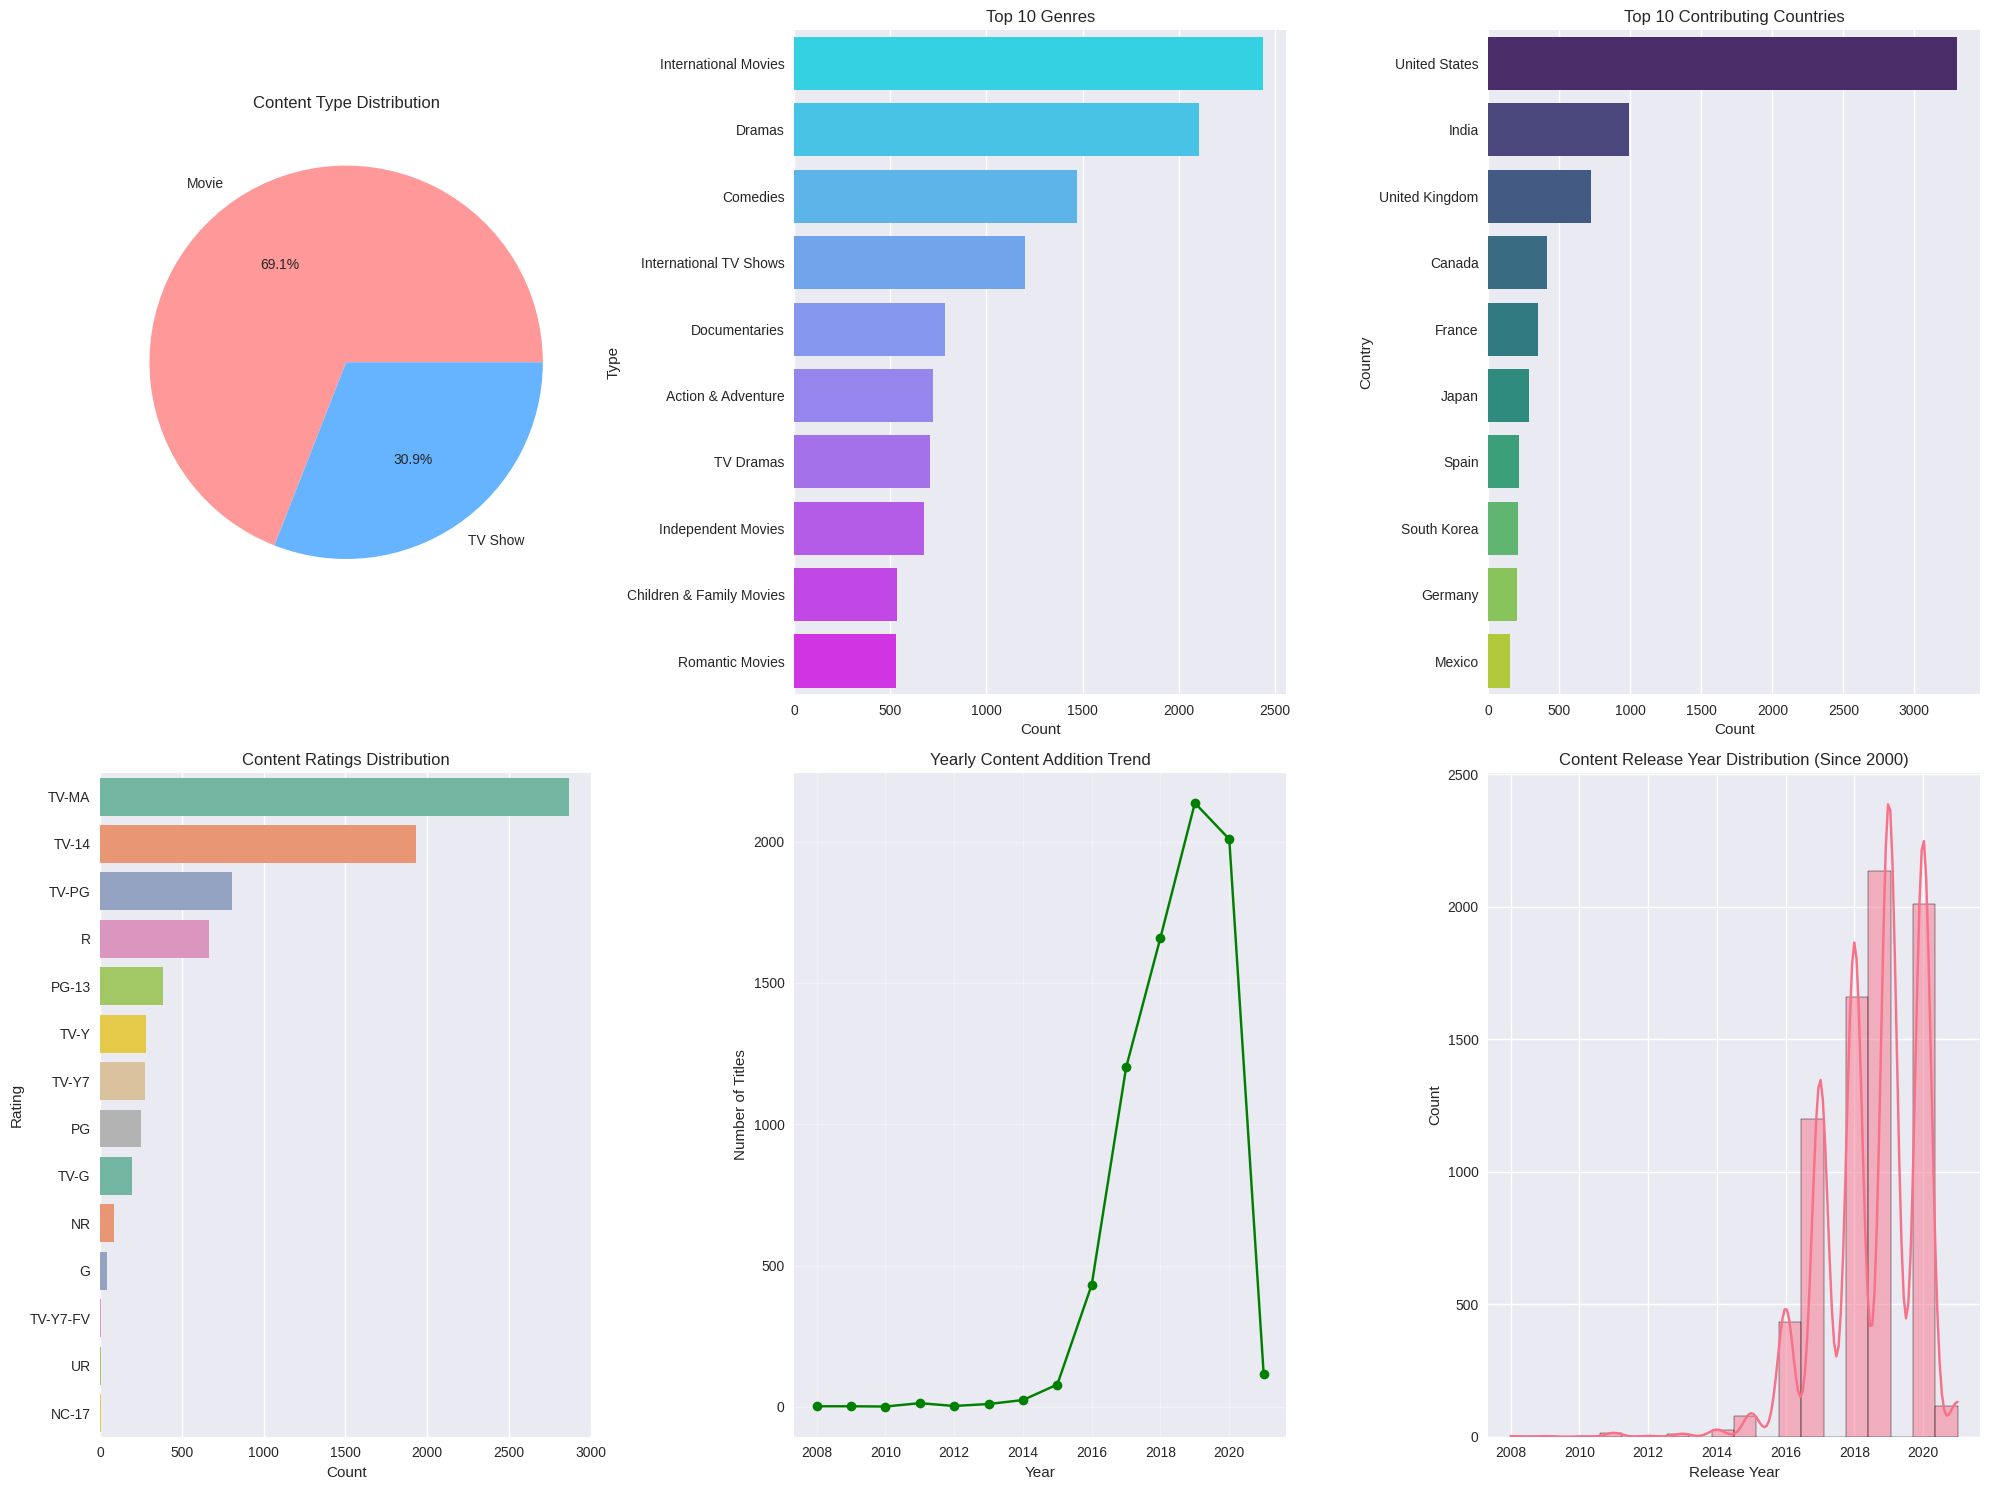

✅ Analysis completed! All visualizations generated.
📈 Key insights and recommendations have been provided.


In [17]:
# Advanced Visualizations
print("="*50)
print("📊 ADVANCED VISUALIZATIONS")
print("="*50)

# Create a comprehensive dashboard
fig = plt.figure(figsize=(20, 15))

# 1. Content Type Distribution
plt.subplot(2, 3, 1)
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Content Type Distribution')
plt.ylabel('')

# 2. Top 10 Genres
plt.subplot(2, 3, 2)
top_10_genres = all_genres.value_counts().head(10)
sns.barplot(y=top_10_genres.index, x=top_10_genres.values, palette='cool')
plt.title('Top 10 Genres')
plt.xlabel('Count')

# 3. Top 10 Countries
plt.subplot(2, 3, 3)
top_10_countries = all_countries.value_counts().head(10)
sns.barplot(y=top_10_countries.index, x=top_10_countries.values, palette='viridis')
plt.title('Top 10 Contributing Countries')
plt.xlabel('Count')

# 4. Ratings Distribution
plt.subplot(2, 3, 4)
ratings_order = df['Rating'].value_counts().index
sns.countplot(y='Rating', data=df, order=ratings_order, palette='Set2')
plt.title('Content Ratings Distribution')
plt.xlabel('Count')

# 5. Yearly Content Addition
plt.subplot(2, 3, 5)
yearly_trend = df.groupby('year_added').size()
yearly_trend.plot(kind='line', marker='o', color='green')
plt.title('Yearly Content Addition Trend')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True, alpha=0.3)

# 6. Release Year Distribution
plt.subplot(2, 3, 6)
recent_years = df[df['release_year'] >= 2000]
sns.histplot(data=recent_years, x='release_year', bins=20, kde=True)
plt.title('Content Release Year Distribution (Since 2000)')
plt.xlabel('Release Year')

plt.tight_layout()
plt.show()

print("✅ Analysis completed! All visualizations generated.")
print("📈 Key insights and recommendations have been provided.")